In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
import requests
from bs4 import BeautifulSoup as soup

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 10]


import seaborn as sns
sns.set()

In [2]:
# all paths and important links here
root = r'C:\Users\Chill\nfl'
YEAR = 2020
file_path = f'C:\\Users\\Chill\\nfl\\play_by_play_{YEAR}.csv.gz'
file_path

'C:\\Users\\Chill\\nfl\\play_by_play_2020.csv.gz'

In [3]:
# ALL STABLE FUNCTIONS HERE

#download from 2015 to 2020 and save data to folder
def download_and_store_data(year):    
    data = pd.read_csv('https://github.com/guga31bb/nflfastR-data/blob/master/data/' \
                             'play_by_play_' + str(year) + '.csv.gz?raw=True',
                             compression='gzip', low_memory=False)
    #save to disk
    path = r'C:\Users\Chill\nfl'
    file_path = f'C:\\Users\\Chill\\nfl\\play_by_play_{year}.csv.gz'

    data.to_csv(file_path, compression='gzip', index=False)

#load data from disk
def load_data(year):
    filepath = f'C:\\Users\\Chill\\nfl\\play_by_play_{year}.csv.gz'
    data = pd.read_csv(filepath, compression='gzip', low_memory=False)                
    return data

def load_multi_years(all_data=True):
    if all_data:
        #list all downloaded data
        data = [file for file in os.listdir(root) if 'play_by_play' in file]
    
        #for each year, read into a df
        df = pd.DataFrame()
        dfs = []
        for file in data:
            df_year = pd.read_csv(file, compression='gzip', low_memory=False)
            dfs.append(df_year)
#         dfs = [pd.read_csv(file, compression='gzip') for file in data]
        df = pd.concat(dfs)
        return df
        #concat all dfs in list using concat

In [4]:
## NEW FUNCTIONS HERE

In [5]:
#ROUTINE CALLS HERE

#download data for the most recent week
download_and_store_data(2021)
#load downloaded data
data = load_data(2021)

In [6]:
# data0 = load_multi_years(True)

In [7]:
data

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,1,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,NaN,NaN,NaN,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.399805,NaN,NaN,NaN,NaN,NaN,0.491433,-49.143299
3,76,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.032412,1.165133,5.803177,4.0,0.896654,0.125098,0.697346,30.265415
4,100,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.532898,0.256036,4.147637,2.0,0.965009,0.965009,0.978253,2.174652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48409,3567,2021_18_WAS_NYG,2022010909,NYG,WAS,REG,18,NYG,home,WAS,...,0,0,-0.293077,NaN,NaN,NaN,NaN,NaN,0.962271,3.772932
48410,3589,2021_18_WAS_NYG,2022010909,NYG,WAS,REG,18,NYG,home,WAS,...,0,0,-0.348626,0.726975,4.990367,4.0,0.624653,0.223981,0.964962,3.503752
48411,3611,2021_18_WAS_NYG,2022010909,NYG,WAS,REG,18,NYG,home,WAS,...,0,0,-0.472049,0.732635,3.484978,2.0,0.271344,0.271344,0.979994,2.000642
48412,3635,2021_18_WAS_NYG,2022010909,NYG,WAS,REG,18,NYG,home,WAS,...,0,0,-2.556099,NaN,NaN,NaN,NaN,NaN,0.980562,1.943767


### 2022-01-12

replicate this https://twitter.com/tejfbanalytics/status/1480904789831688198/photo/1

- find needed columns
- filter rbs who have more than 100 touches
- -calculate epa/rush, yards/carry, expecte dyards, rushing yards over expected
- sort in order of RYOE

- understand difference b/w rush_attemp vs rush
- how to deal with QB's rushing attempt
- rushes don't seem to match

In [21]:
cols = ['posteam', 'rush_attempt', 'rush', 'rusher_player_id', 'rusher_player_name', 'rushing_yards', 'rusher_id', 'epa',  ]
# rush_attemp or rush?
# rushing yards/expected: calc manually
rush_data = data[cols].copy()
rush_data

,posteam,rush_attempt,rush,rusher_player_id,rusher_player_name,rushing_yards,rusher_id,epa
0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,TEN,0.0,0,NaN,NaN,NaN,NaN,0.000000
2,TEN,1.0,1,00-0032764,D.Henry,-3.0,00-0032764,-1.399805
3,TEN,0.0,0,NaN,NaN,NaN,NaN,0.032412
4,TEN,0.0,0,NaN,NaN,NaN,NaN,-1.532898
...,...,...,...,...,...,...,...,...
48409,NYG,0.0,0,NaN,NaN,NaN,NaN,-0.293077
48410,NYG,0.0,0,NaN,NaN,NaN,NaN,-0.348626
48411,NYG,0.0,0,NaN,NaN,NaN,NaN,-0.472049
48412,NYG,0.0,0,NaN,NaN,NaN,NaN,-2.556099


In [12]:
rush_data.sum()

rush_attempt     14538.000000
rush             13561.000000
rushing_yards    62668.000000
epa               -424.388801
dtype: float64

In [32]:
#see which player rush in which group in rush attemp
g1 = rush_data.groupby(['rush_attempt', 'rush', 'rusher_player_name'])
df1 = g1['rushing_yards'].sum()
#how to refer to multilever index

rush_attempt  rush  rusher_player_name
1.0           0     A.Dalton               76.0
                    A.Rodgers              53.0
                    Aa.Rodgers             45.0
                    B.Allen                -3.0
                    B.Gabbert              -7.0
                                          ...  
              1     Z.Ertz                  4.0
                    Z.Jones                 3.0
                    Z.Moss                345.0
                    Z.Pascal               21.0
                    Z.Wilson                7.0
Name: rushing_yards, Length: 433, dtype: float64

In [42]:

# g1 = rush_data.groupby(['rush_attempt', 'rush'])
# g1['rushing_yards'].sum()
g = rush_data.groupby(['rusher_player_id', 'rusher_player_name'])
# df = g[['posteam', 'rush_attempt', 'rush', 'rushing_yards', 'epa']].agg({'posteam':'unique', 'rush_attempt':'sum','rush':'sum', 'rushing_yards':'count', 'rushing_yards':'sum', 'epa':'sum'})
df = g[['posteam', 'rush_attempt', 'rush', 'rushing_yards', 'epa']].agg({'posteam':'unique', 'rush_attempt':'sum', 'rush':'sum', 'rushing_yards':'count', 'epa':'sum'})

df['yards per carry'] = np.round(df.rushing_yards / df.rush_attempt, 2)

df['epa/rush'] = np.round(df.epa / df.rush_attempt, 2)
df = df[df.rush_attempt > 100]
df.sort_values(by='epa/rush', ascending=False)
df[df.rush != df.rushing_yards]

,,posteam,rush_attempt,rush,rushing_yards,epa,yards per carry,epa/rush
rusher_player_id,rusher_player_name,,,,,,,
00-0032764,D.Henry,[TEN],220.0,220,219,-4.842254,1.00,-0.02
00-0033045,E.Elliott,[DAL],240.0,240,237,-16.109372,0.99,-0.07
00-0033699,A.Ekeler,[LAC],208.0,208,206,-0.895591,0.99,-0.00
00-0033893,D.Cook,[MIN],251.0,251,249,-9.775773,0.99,-0.04
00-0033897,J.Mixon,[CIN],294.0,294,292,-25.433311,0.99,-0.09
00-0033906,A.Kamara,[NO],241.0,241,240,-40.904552,1.00,-0.17
00-0034796,L.Jackson,[BAL],134.0,77,133,15.515112,0.99,0.12
00-0034857,J.Allen,[BUF],120.0,64,118,56.909840,0.98,0.47
00-0034972,A.Mattison,[MIN],135.0,135,134,-25.995399,0.99,-0.19


### 2022-01-02
#### show average EPA per game for QBS in season 2021

- filter posteam data
- groupby passer, filter > 50 total passes
- groupby passer, week/game, calculate mean


In [18]:
def filter_func(x):
    return x['qb_epa'].count() > 50

data.qb_epa.size #42795
data.qb_epa.count() #42073 #Return number of non-NA/null observations in the Series.
data.qb_epa.isnull().sum() #722
data.qb_epa.isna().sum() #722
42795-42073 #722

722

In [19]:
data.posteam.unique()
# - filter posteam data
## -> drop nan rows. a team attacks = a team defends -> can't filter
#drop rows with missing qb epas
data1 = data[~data.qb_epa.isnull()].copy()
# - groupby passer, filter > 50 total passes
g = data1.groupby(['passer'])
# df = g[['game_id', 'home_team', 'away_team', 'home_score', 'away_score', 'posteam', 'passer', 'qb_epa']].filter(filter_func)
df = g.filter(filter_func)
# - groupby passer, week/game, calculate mean
g2 = df.groupby(['passer', 'week'])
qb = g2[['pass', 'qb_epa']].agg({'pass':'count', 'qb_epa':'mean'})
#calculate total pass per qb, sort qb by that
#calculate total epa per passer
g3 = df.groupby(['passer'])
qb_epa_sort =  g3[['pass', 'qb_epa']].sum().sort_values('qb_epa', ascending=False)
qbs = qb_epa_sort[qb_epa_sort['pass'] > 400].index


In [24]:
total = g2[['pass', 'qb_epa']].agg({'pass':'sum', 'qb_epa':'sum'})
avg_epa = qb.qb_epa/qb['pass']


passer    week
A.Dalton  1      -0.005299
          2       0.030172
          5       1.592280
          11      0.009558
          12      0.005246
                    ...   
Z.Wilson  13      0.001336
          14     -0.005583
          15     -0.009233
          16      0.012230
          17      0.007443
Length: 550, dtype: float64

In [11]:
qb_epa_sort[qb_epa_sort['pass'] > 300].index

Index(['P.Mahomes', 'Aa.Rodgers', 'T.Brady', 'J.Herbert', 'J.Allen',
       'M.Stafford', 'J.Burrow', 'J.Garoppolo', 'K.Murray', 'D.Prescott',
       'K.Cousins', 'M.Jones', 'D.Carr', 'T.Bridgewater', 'C.Wentz', 'J.Hurts',
       'R.Tannehill', 'L.Jackson', 'R.Wilson', 'M.Ryan', 'T.Tagovailoa',
       'B.Mayfield', 'T.Heinicke', 'D.Jones', 'B.Roethlisberger', 'J.Goff',
       'J.Fields', 'T.Lawrence', 'S.Darnold', 'D.Mills', 'Z.Wilson'],
      dtype='object', name='passer')

In [12]:
qb.index

MultiIndex([(  'A.Dalton',  1),
            (  'A.Dalton',  2),
            (  'A.Dalton',  5),
            (  'A.Dalton', 11),
            (  'A.Dalton', 12),
            (  'A.Dalton', 13),
            (  'A.Dalton', 17),
            ('Aa.Rodgers',  1),
            ('Aa.Rodgers',  2),
            ('Aa.Rodgers',  3),
            ...
            (  'Z.Wilson',  3),
            (  'Z.Wilson',  4),
            (  'Z.Wilson',  5),
            (  'Z.Wilson',  7),
            (  'Z.Wilson', 12),
            (  'Z.Wilson', 13),
            (  'Z.Wilson', 14),
            (  'Z.Wilson', 15),
            (  'Z.Wilson', 16),
            (  'Z.Wilson', 17)],
           names=['passer', 'week'], length=550)

In [55]:
#cumulative epa by week
qb

pass    qb_epa  cumulative epa
passer   week                                
A.Dalton 1       43 -0.227844       -0.227844
         2       16  0.482750        0.254906
         5        1  1.592280        1.847186
         11      25  0.238948        2.086134
         12      44  0.230816        2.316950
...             ...       ...             ...
Z.Wilson 13      41  0.054786       46.772609
         14      53 -0.295913       46.476696
         15      34 -0.313920       46.162777
         16      26  0.317977       46.480754
         17      35  0.260522       46.741276

[550 rows x 3 columns]

In [36]:
qb.reset_index()

,passer,week,pass,qb_epa,cumulative epa
0,A.Dalton,1,43,-0.227844,-0.227844
1,A.Dalton,2,16,0.482750,0.254906
2,A.Dalton,5,1,1.592280,1.847186
3,A.Dalton,11,25,0.238948,2.086134
4,A.Dalton,12,44,0.230816,2.316950
...,...,...,...,...,...
545,Z.Wilson,13,41,0.054786,46.772609
546,Z.Wilson,14,53,-0.295913,46.476696
547,Z.Wilson,15,34,-0.313920,46.162777
548,Z.Wilson,16,26,0.317977,46.480754


<AxesSubplot:xlabel='week', ylabel='qb_epa'>

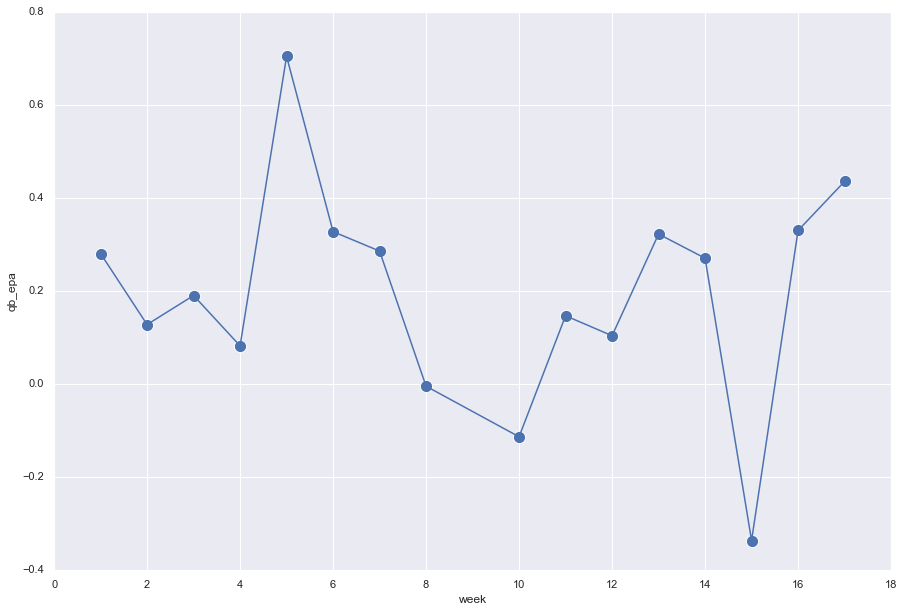

In [59]:
sns.scatterplot(data=qb1[qb1.passer=='T.Brady'], x='week', y='qb_epa',
               s=150)
sns.lineplot(data=qb1[qb1.passer=='T.Brady'], x="week", y="qb_epa",
            legend='full')

In [54]:
qb1[qb1.passer=='P.Mahomes']

,passer,week,pass,qb_epa,cumulative epa
370,P.Mahomes,1,45,0.511130,35.808516
371,P.Mahomes,2,33,0.536015,36.344531
372,P.Mahomes,3,53,0.246823,36.591354
373,P.Mahomes,4,38,0.645228,37.236582
374,P.Mahomes,5,70,0.061226,37.297808
375,P.Mahomes,6,57,0.279995,37.577803
376,P.Mahomes,7,46,-0.174266,37.403538
377,P.Mahomes,8,55,0.052567,37.456104
378,P.Mahomes,9,40,-0.161418,37.294686
379,P.Mahomes,10,50,0.497858,37.792544


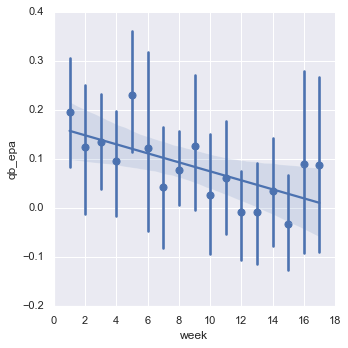

In [76]:
sns.lmplot(data=qb1, x="week", y="qb_epa", x_estimator=np.mean)

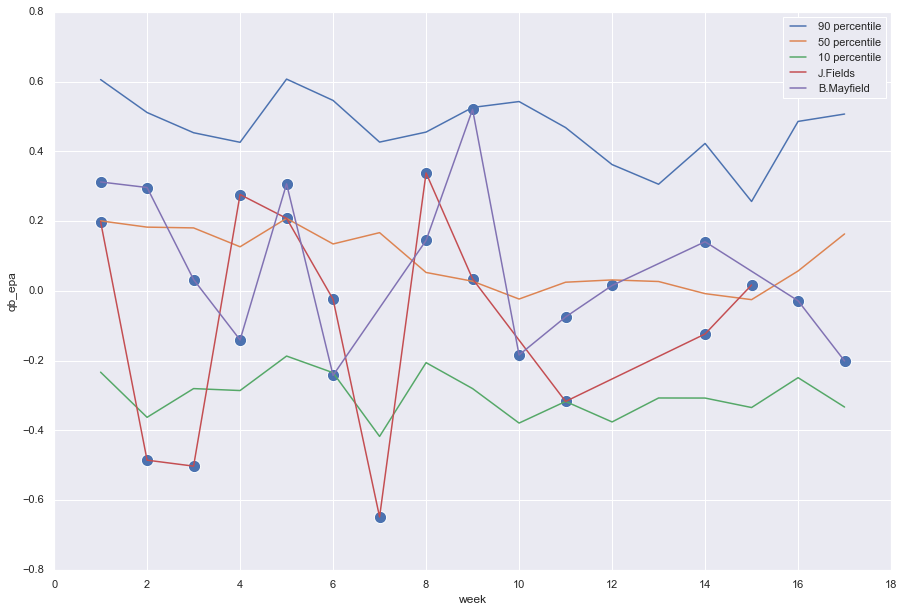

In [81]:
# sns.lineplot(data=qb1, x="week", y="qb_epa",
#             legend='full')
# sns.scatterplot(data=qb1[qb1.passer=='P.Mahomes'], x='week', y='qb_epa',
#                s=150)
# sns.lineplot(data=qb1[qb1.passer=='P.Mahomes'], x="week", y="qb_epa",
#             legend='full')
sns.lineplot(data=percentile90,# x="week", y="qb_epa",
            legend='full')
sns.lineplot(data=percentile50,# x="week", y="qb_epa",
            legend='full')
sns.lineplot(data=percentile10,# x="week", y="qb_epa",
            legend='full')
plt.legend(labels=['Mahomes', '90 percentile', '50 percentile', '10 percentile'])
plot_sns_qb('J.Fields', qb1)
plot_sns_qb('B.Mayfield', qb1)
plt.legend(labels=['Mahomes', '90 percentile', '50 percentile', '10 percentile', 'J.Fields', 'B.Mayfield'])
plt.legend(labels=['90 percentile', '50 percentile', '10 percentile', 'J.Fields', 'B.Mayfield'])


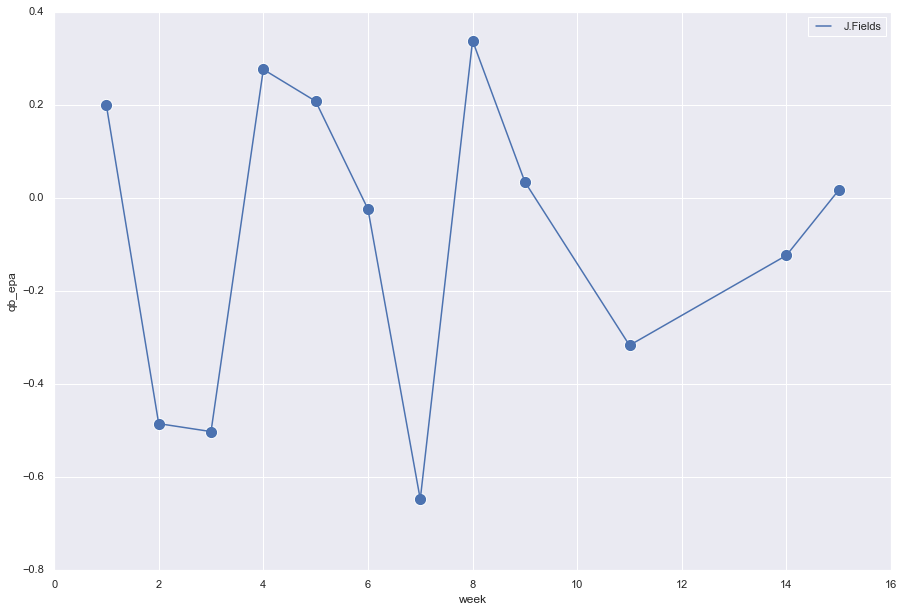

In [78]:
def plot_sns_qb(qb_name, df):
    sns.scatterplot(data=df[df.passer==qb_name], x='week', y='qb_epa',
               s=150)
    sns.lineplot(data=df[df.passer==qb_name], x="week", y="qb_epa",
            legend='full')
    plt.legend(labels=[qb_name])


In [70]:
percentile90 = qb1.groupby(['week'])['qb_epa'].quantile(q=0.9)
percentile10 = qb1.groupby(['week'])['qb_epa'].quantile(q=0.1)
percentile50 = qb1.groupby(['week'])['qb_epa'].quantile(q=0.5)

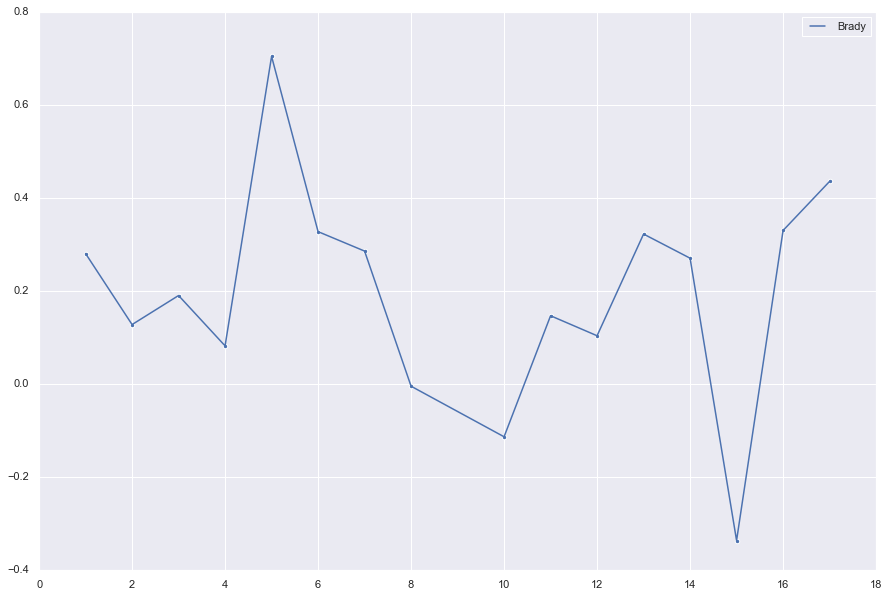

In [37]:
qb['cumulative epa'] = qb['qb_epa'].cumsum()
qb1 = qb.reset_index()
a = qb1[qb1.passer=='T.Brady'][['passer', 'week', 'qb_epa']]
plt.scatter(a.week, y=a.qb_epa)
plt.plot(a.week, a.qb_epa, label='Brady')
plt.legend()
def plot_one_qb(name):
    a = qb1[qb1.passer==name][['passer', 'week', 'qb_epa']]
    plt.scatter(a.week, y=a.qb_epa)
    plt.plot(a.week, a.qb_epa, label=name)

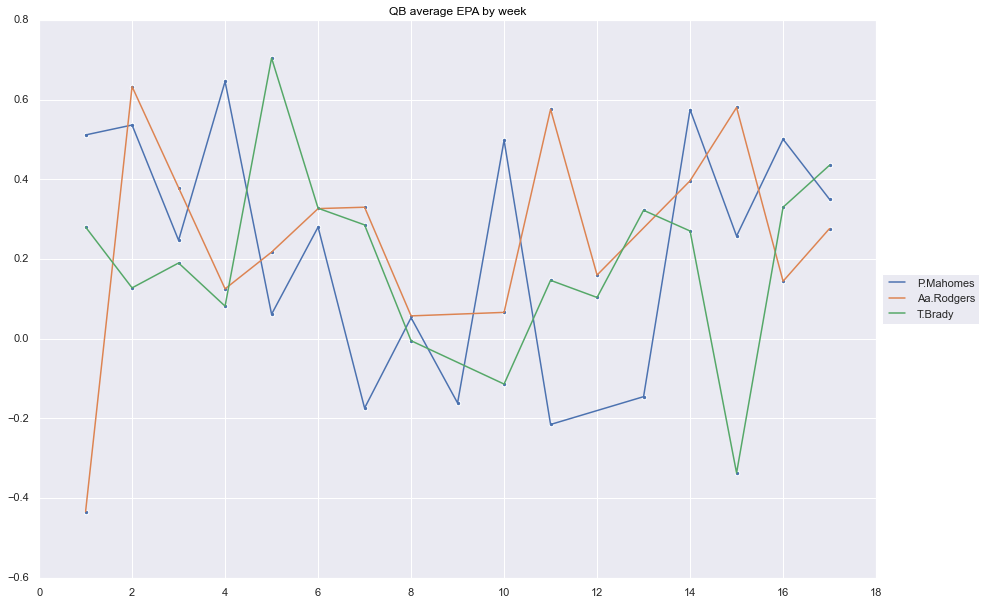

In [15]:
qb1 = qb.reset_index()
plt.figure()
plt.title('QB average EPA by week', color='black')
# for name in qb1.passer.unique():
for name in qbs[:3]:
    plot_one_qb(name)
#for ea passer in qb.passer.unique()
#create new df = qb[qb.passer==name]['passer', 'week', 'qb_epa']
#plot and add legend
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

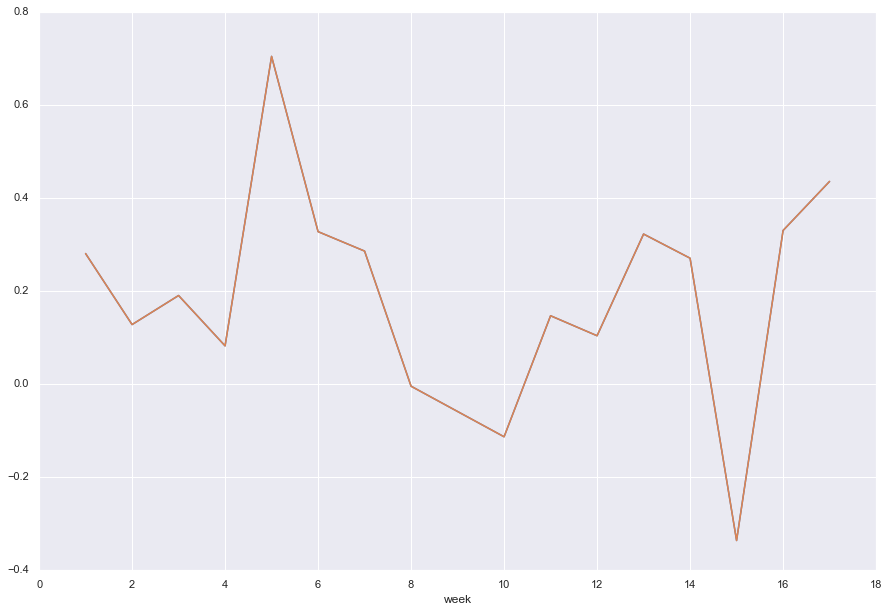

In [16]:
qb.loc['T.Brady']['qb_epa'].plot()
plt.plot(qb.loc['T.Brady']['qb_epa'])

In [17]:
df[df.qb_epa.isnull()]

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe


722

### 2021-12-23
#### show results of games Brady played in. Find how many games his team has been shut out
show how many games that the team Brady played QB has been shut out?

- load all data avaliable, even from long ago
- search for Brady's player ID
- find games Brady played in, at least 10 snaps
- find final results of ea games
- compute how many games Brady got shut out

In [13]:
data0.head()
d0 = data0[['game_id', 'home_team', 'away_team', 'home_score', 'away_score', 'passer']].copy()
d0 = d0[d0.passer=='T.Brady']
df2 = d0.groupby('game_id').last()
# approach 1: if tB is home team, check if home score is 0. Same for away team TB
# appraoch 2: filter home_score or away score =0. Then check if the team getting shut out is TB
## -> use approach 2
# df1[(df1.home_score==0 & df1.home_team=='TB') | (df1.away_score==0 & df1.away_team=='TB')]


In [20]:
df2[(df2.home_team.isin(['NE','TB']))]
df2[((df2.home_score==0) & (df2.home_team.isin(['NE','TB'])))]

,home_team,away_team,home_score,away_score,passer
game_id,,,,,
2021_15_NO_TB,TB,NO,0,9,T.Brady


In [26]:
result = df2[( (df2.home_score==0) & (df2.home_team.isin(['NE','TB'])) ) | ( (df2.away_score==0) & (df2.away_team.isin(['NE','TB'])) )]
result.drop(result.iloc[1].name)

,home_team,away_team,home_score,away_score,passer
game_id,,,,,
2003_01_NE_BUF,BUF,NE,31,0,T.Brady
2006_14_NE_MIA,MIA,NE,21,0,T.Brady
2021_15_NO_TB,TB,NO,0,9,T.Brady


In [36]:
### 2021-12-23
# [elem for elem in data.columns if 'id' in elem]
# passer_id
# find Tom Brady's id
# data.passer_id.passer_id
# [elem for elem in data.columns if 'passer' in elem]
# ['passer_player_id',
#  'passer_player_name',
#  'passer',
#  'passer_jersey_number',
#  'passer_id']

data.passer.unique()
# -> 'T.Brady'
data.columns
data # game_id, home_team, away_team, result?
[elem for elem in data.columns if 'score' in elem] #home_score, away_score

data1 = data[['game_id', 'home_team', 'away_team', 'home_score', 'away_score', 'passer']].copy()
data1 = data1[data1.passer=='T.Brady']
df1 = data1.groupby('game_id').last()
# approach 1: if tB is home team, check if home score is 0. Same for away team TB
# appraoch 2: filter home_score or away score =0. Then check if the team getting shut out is TB
## -> use approach 2
# df1[(df1.home_score==0 & df1.home_team=='TB') | (df1.away_score==0 & df1.away_team=='TB')]
df1[(df1.home_score==0 & df1.home_team.isin(['TB'])) | (df1.away_score==0 & df1.away_team.isin(['TB']))]

,home_team,away_team,home_score,away_score,passer
game_id,,,,,
2021_15_NO_TB,TB,NO,0,9,T.Brady


In [20]:
data.passer

0                NaN
1                NaN
2                NaN
3        R.Tannehill
4        R.Tannehill
            ...     
40030            NaN
40031            NaN
40032            NaN
40033            NaN
40034            NaN
Name: passer, Length: 40035, dtype: object

In [7]:
#routine clean data here
#CLEAN DATA

#only use regular season data
data = data.loc[data.season_type =='REG']
# remove kickoffs, field goals, kneel downs... Limited to passes, runs, play with penalties
data = data.loc[(data.play_type.isin(['no_play','pass','run'])) & (data.epa.isna()==False)]
#change paly_type to match play call. QB scrambles are in fact pass plays, not run plays
data.loc[data['pass']==1, 'play_type'] = 'pass'
data.loc[data.rush==1, 'play_type'] = 'run'
#in-place reset index again
data.reset_index(drop=True, inplace=True)

In [8]:
data.shape

(19630, 372)

## 2021-11-12, Fri


In [ ]:
#show # missing data points per column
missing_values_count = nfl_data.isnull().sum()

#total cells
#total num of missin g vals
total_cells = np.product(nfl_data.shape)
total_missing = missing_values_count.sum()

#drop na: ev row that has missing data
#drop cols that have missing data
data.dropna(axis=1)

#fillna.
data.fillna(0)

##replace all the remaining na's with 0
subset_nfl_data.fillna(method='bfill', axis=0).fillna(0)


## 2021-11-01, Mon

Task: reproduce Ben Baldwin's graph plotting CPOE vs EPA per play for all QBs first 236 plays
Steps:
- do for 2021 rookie QBs first
- [done] update data 
- write down new qb rookie 2021. How? use BB's graph b/c no data roster atm
- identify new qbs: identify all passers with > 100 passes. then try to check if they have any rush or kneel down.
- gorupby (rookie) QBs, for cols CPOE and EPA per play.
- do ML: line reg
- plot scatter, with names attached to
- plot regression line


In [6]:
data #2021
#show all games
data['game_id'].value_counts()
data.groupby(['week'])['game_id'].unique().loc[8]

# what are the 2021 rookie QBs. Find their ID
rookies = ['T.Lance', 'Z.Wilson', 'J.Fields', 'T.Lawrence', 'D.Mills', 'M.Jones']

#what cols should i use
cols = ['cpoe', 'epa']

#passer_player_id,  rusher_player_id
#show all qbs with >100 passes
##for all posteam plays, group by passer_player_id, count and filter qbs who pass > 100
grouped = data.groupby(['passer_player_id', 'passer_player_name'])
results = grouped[['passer_player_name']].count()
results = results.sort_index()
results = results.rename(columns={'passer_player_name':'num_passes'})
results = results.reset_index(level=['passer_player_name'])

In [7]:
results[results['passer_player_name'].isin(rookies)]
#filter passers with > 50 passes
chosen_qbs = results[results['num_passes'] >=50]['passer_player_name']
#check if they have any rushes/scrambles/ non-epa rows
# qbs = data[data['passer_player_name'].isin(chosen_qbs)]
qb_rushes = data[data['rusher_player_name'].isin(chosen_qbs)]
qb_rushes.groupby(['rusher_player_name']).agg({'rusher_player_name':'count', 'rushing_yards':'mean'});

In [13]:
qbs.loc[:, 'passer_player_name'].values

array(['R.Tannehill', 'R.Tannehill', 'K.Murray', ..., 'T.Heinicke',
       'T.Heinicke', 'T.Heinicke'], dtype=object)

In [15]:
qbs= data[(data['rusher_player_name'].isin(chosen_qbs)) | (data['passer_player_name'].isin(chosen_qbs))]
# need to combine data from 2 columns: russher name and passert name into one col: qb_name
qbs['qb'] = qbs.loc[:, 'passer_player_name'].values
qbs['qb'] = qbs['qb'].fillna(data['rusher_player_name'])
qbs


<ipython-input-15-8392d2e6cadf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qbs['qb'] = qbs.loc[:, 'passer_player_name'].values
<ipython-input-15-8392d2e6cadf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qbs['qb'] = qbs['qb'].fillna(data['rusher_player_name'])


,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe,qb
3,76,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,1,0.032412,1.165133,5.803177,4.0,0.896654,0.125098,0.697346,30.265415,R.Tannehill
4,100,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,1,-1.532898,0.256036,4.147637,2.0,0.965009,0.965009,0.978253,2.174652,R.Tannehill
6,152,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,1,2.692890,0.567838,7.420427,4.0,1.000000,1.000000,0.458989,54.101130,K.Murray
7,181,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,1,-1.009908,NaN,NaN,NaN,NaN,NaN,0.419833,-41.983327,K.Murray
8,218,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,1,-0.511090,1.036891,10.339405,9.0,0.478471,0.079696,0.684949,31.505138,K.Murray
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21874,3532,2021_08_WAS_DEN,2021103110,DEN,WAS,REG,8,DEN,home,WAS,...,0,-0.133953,0.170859,3.568737,2.0,0.998732,0.969896,0.112628,88.737196,T.Bridgewater
21876,3597,2021_08_WAS_DEN,2021103110,DEN,WAS,REG,8,WAS,away,DEN,...,0,-0.266090,0.274048,2.110007,1.0,1.000000,0.994660,0.964308,3.569198,T.Heinicke
21878,3640,2021_08_WAS_DEN,2021103110,DEN,WAS,REG,8,WAS,away,DEN,...,0,-0.725899,NaN,NaN,NaN,NaN,NaN,0.981736,1.826423,T.Heinicke
21880,3676,2021_08_WAS_DEN,2021103110,DEN,WAS,REG,8,WAS,away,DEN,...,0,-0.203048,0.444315,6.603503,6.0,0.751595,0.084057,0.991238,0.876170,T.Heinicke


In [58]:
g = qbs.groupby(['qb'])
results = g[['epa', 'cpoe']].agg({'cpoe':'mean', 'epa':'mean'})
results

,cpoe,epa
qb,,
A.Dalton,-0.302714,-0.073928
Aa.Rodgers,5.579469,0.160746
B.Mayfield,2.328116,0.044434
B.Roethlisberger,-1.677122,-0.021131
C.Wentz,-0.393721,0.011340
D.Carr,2.543505,0.152078
D.Jones,-1.415631,0.031487
D.Mills,0.109247,-0.222010
D.Prescott,7.624095,0.175031


In [61]:
rookies = ['D.Mills', 'J.Fields', 'T.Lawrence', 'M.Jones', 'T.Lance', 'Z.Wilson']
for name in rookies:
#     ax.annotate(name, results.loc[name])
    print(name, results.loc[name])


D.Mills cpoe    0.109247
epa    -0.222010
Name: D.Mills, dtype: float64
J.Fields cpoe   -3.309763
epa    -0.205240
Name: J.Fields, dtype: float64
T.Lawrence cpoe   -4.681417
epa    -0.090123
Name: T.Lawrence, dtype: float64
M.Jones cpoe    2.935897
epa     0.022680
Name: M.Jones, dtype: float64
T.Lance cpoe   -10.485726
epa      0.035084
Name: T.Lance, dtype: float64
Z.Wilson cpoe   -6.686993
epa    -0.236496
Name: Z.Wilson, dtype: float64


<Figure size 1440x1440 with 0 Axes>

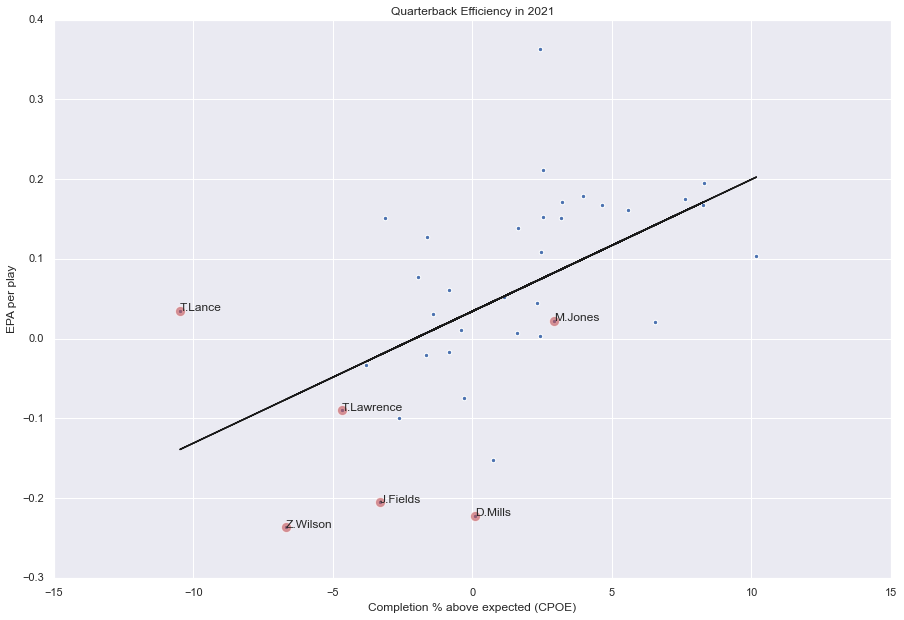

In [69]:
# fig, ax = plt.subplots()
# ax.plot(results['epa'], results['cpoe'], kind='scatter', ax=ax)

# for k, v in df.iterrows():
#     ax.annotate(k, v)
plt.figure(figsize=(20,20))
fig, ax = plt.subplots()
ax.scatter(results['cpoe'], results['epa'])
plt.xlabel('Completion % above expected (CPOE)')
plt.ylabel('EPA per play')
plt.title('Quarterback Efficiency in 2021')
rookies = ['D.Mills', 'J.Fields', 'T.Lawrence', 'M.Jones', 'T.Lance', 'Z.Wilson']
mask = results.index.isin(rookies)
rookie_stats = results[mask]
ax.scatter(rookie_stats['cpoe'], rookie_stats['epa'], c='r', marker="o", s=100, alpha=0.6)
for name in rookies:
    ax.annotate(name, results.loc[name])
#     print(name, results.loc[name])
ax.plot(results[['cpoe']], model.predict(results[['cpoe']]) ,color='k')
# for index, series in results.iterrows():
# #     print(k, v)
# #     print(v.loc['epa'], v.loc['cpoe'])
#     ax.annotate(index, series)


# fig, ax = plt.subplots()
# ax.scatter(z, y)

# for i, txt in enumerate(n):
#     ax.annotate(txt, (z[i], y[i]))

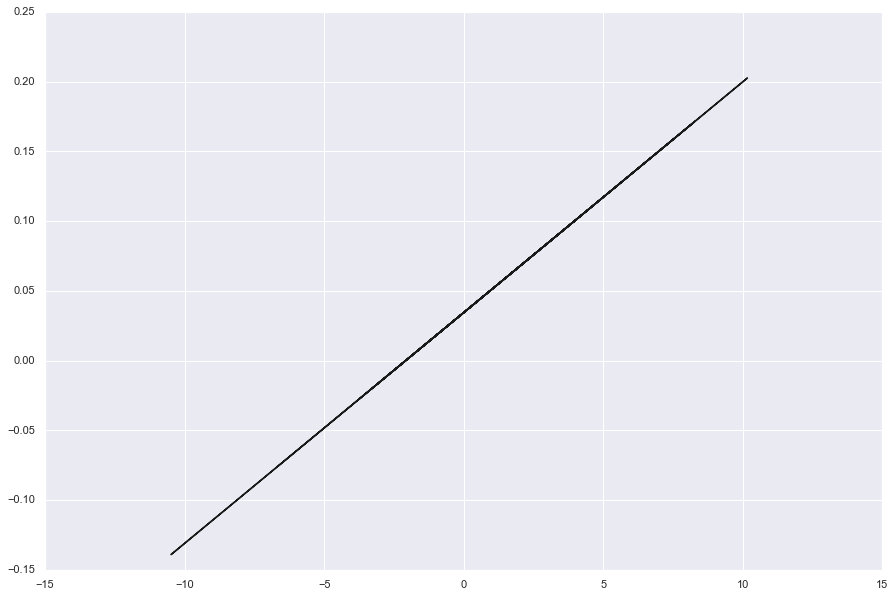

In [67]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(results[['cpoe']], results['epa'])

plt.plot(results[['cpoe']], model.predict(results[['cpoe']]) ,color='k')

plt.show()

In [36]:
chosen_qbs
rookies = ['D.Mills', 'J.Fields', 'T.Lawrence', 'M.Jones', 'T.Lance', 'Z.Wilson']

passer_player_id
00-0019596             T.Brady
00-0022924    B.Roethlisberger
00-0023459          Aa.Rodgers
00-0026143              M.Ryan
00-0026498          M.Stafford
00-0027973            A.Dalton
00-0029263            R.Wilson
00-0029604           K.Cousins
00-0029701         R.Tannehill
00-0030565             G.Smith
00-0031237       T.Bridgewater
00-0031280              D.Carr
00-0031345         J.Garoppolo
00-0031503           J.Winston
00-0031800          T.Heinicke
00-0032950             C.Wentz
00-0033077          D.Prescott
00-0033106              J.Goff
00-0033119          J.Brissett
00-0033873           P.Mahomes
00-0034401             M.White
00-0034796           L.Jackson
00-0034855          B.Mayfield
00-0034857             J.Allen
00-0034869           S.Darnold
00-0035228            K.Murray
00-0035710             D.Jones
00-0036212        T.Tagovailoa
00-0036355           J.Herbert
00-0036389             J.Hurts
00-0036442            J.Burrow
00-0036898            

## 2021-10-29, Fri
- Task: how good Ja'Maar Chase has been
- find his ID in 2021
- what are the tea
- Compute EPA per game since first professional start.
- Compute similar measures for other rookie receives in 2021
- Do the same for previous years

In [38]:
data.shape
data.columns
data['posteam'].unique()
'CIN'
#show all receivers who has received a pass for CIN in 2021
#cols: receiver_player_id, receiver_player_name
bengals = data[data['posteam']=='CIN']
cols = ['receiver_player_id', 'receiver_player_name']
receivers = bengals[cols]
receivers['receiver_player_id'].unique()
#for each id, select the first match???
receivers
#drop nan
#drop duplicates
receivers = receivers.drop_duplicates(keep='first').dropna()

# chase = ('00-0036900', )
# receivers.dtypes #all objects
receivers
receivers['receiver_player_name'].loc[1843]
'J.Chase' in receivers['receiver_player_name']
# dot . in name -> have to disable regex
#https://stackoverflow.com/questions/52109823/pandas-str-contains-gives-wrong-results
receivers['receiver_player_name'].str.contains('Chase', regex=False)
receivers.loc[1843] # or using the boolean mask too
receivers[receivers['receiver_player_name'].str.contains('Chase', regex=False)]

,receiver_player_id,receiver_player_name
1843,00-0036900,J.Chase


<AxesSubplot:xlabel='week'>

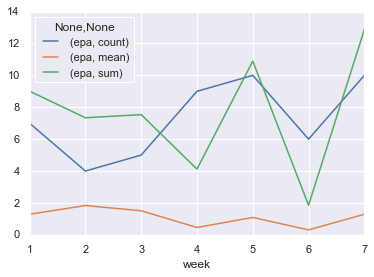

In [50]:
#df: posteam. groupby receiver_player_id, week. show epa sum for each week
# offense_data = data[]
grouped = data.groupby(['receiver_player_id', 'receiver_player_name', 'week'])
df1 = grouped[['epa']].agg(['count', 'mean', 'sum'])
#condition: count > 5
# df1[df1['receiver_player_id']=='00-0036900']
df1.loc[('00-0036900', 'J.Chase')]
df1.loc[('00-0036900', 'J.Chase')].plot()
#plot cumulative sum of epa by week


### 2021-10-26, Tue

- task:analyze field goals
- justin tucker
- what is the average completion rate of field goals per season
- what is the record for longest field goal in a season
    - plot the progression
- which game has the most missed FG? records, team.. which team is blessed with good FG kicker
- which team has the most stability at FG kicker

----
- 


In [115]:
#what play types are there
data.play_type.unique()
#array([nan, 'kickoff', 'run', 'pass', 'punt', 'no_play', 'field_goal',
 #      'extra_point', 'qb_spike', 'qb_kneel'], dtype=object)
#do play_type and field_goal_attempt match i.e field_goal_attempt <-> play_type

# check if the sum of matching items is equal to the length of data
sum((data.play_type=='field_goal') == (data.field_goal_attempt==1)) == data.shape[0]
#yes

#what are the results of a fieldgoal attempt
data.field_goal_result.unique()
# array([nan, 'made', 'missed', 'blocked'], dtype=object)

#does a field goal attemp include timeout or not?
#check if `timeout` is 1 when a field goal was attempted
data[data.field_goal_attempt==1]['timeout'].unique()
#all 0 -> field goal attempts mean ball is actually kicked

#typically, how many field goal attempts are there in a game
# approach 1: create new df of field goal attempts only, groupby game then call size
# app 2: use the full data, groupby fg attemps, select col field_goal_attempt then sum since field_goal_attempt is binary
#groupby game, count field goal attempt
fg = data[data.field_goal_attempt==1] #field goal attempts only
group = fg.groupby(['game_id'])
# group['field_goal_attempt'].sum().sort_values(ascending=False)
group.size().sort_values(ascending=False)
#game 5 GB-CIN has the most FG att with 9

#percentage of successful FG per game
#create new def the return number of made FG
# def num_kicks_made(df):
#     return df[df.field_goal_result=='made'].size()
def num_kicks_made(s):
    return s[s=='made'].count()
def num_kicks_failed(s):
#     return s.size - [s=='made'].count()
#     return s.isin(['missed', 'blocked']).count()
    return [s!='made'].count()
# func = {'field_goal_attempt':['size'],'field_goal_result': []}
results = group[['field_goal_result']].agg(['size', num_kicks_made])
#create new col: success / total attemps, round by 2
results.columns = results.columns.droplevel()
results['completion_percentage'] = (results.num_kicks_made / results['size']).round(2)
results= results.rename(columns={'size':'fg_attemps'})
results
##### SIZE IS A PROPERTY OF THE DATAFRAME => DON'T USE DOT NOTATION!!!!!!
results.sort_values(by='completion_percentage', ascending=False)
results.sort_values(by=['fg_attemps','completion_percentage'], ascending=[False, True])
results.sort_values(by='completion_percentage', ascending=True)

# game with most missed fgs
(results.fg_attemps - results.num_kicks_made).sort_values(ascending=False)

#which week has the most missed field goal attempts
#fg:groupby week, same as before lol
g2 = fg.groupby(['week', 'game_id'])
results2 = g2[['field_goal_result']].agg(['size', num_kicks_made]) #,'unique'])
results2.columns = results2.columns.droplevel()
results2 = results2.rename(columns={'size':'fg_attempts'})
results2['num_kicks_failed'] = results2.fg_attempts - results2.num_kicks_made
results2

fg_attempts  num_kicks_made  num_kicks_failed
week game_id                                                       
1    2021_01_ARI_TEN            3               1                 2
     2021_01_BAL_LV             4               4                 0
     2021_01_CHI_LA             2               2                 0
     2021_01_CLE_KC             2               2                 0
     2021_01_DAL_TB             6               4                 2
...                           ...             ...               ...
7    2021_07_IND_SF             3               3                 0
     2021_07_KC_TEN             4               3                 1
     2021_07_NYJ_NE             3               2                 1
     2021_07_PHI_LV             2               2                 0
     2021_07_WAS_GB             4               2                 2

[105 rows x 3 columns]

In [130]:
r3 = results2.reset_index()
len(r3[r3.week ==5])
r3[r3.week ==5]

,week,game_id,fg_attempts,num_kicks_made,num_kicks_failed
63,5,2021_05_BUF_KC,3,3,0
64,5,2021_05_CHI_LV,3,3,0
65,5,2021_05_CLE_LAC,2,2,0
66,5,2021_05_DEN_PIT,4,4,0
67,5,2021_05_DET_MIN,8,7,1
68,5,2021_05_GB_CIN,9,4,5
69,5,2021_05_IND_BAL,5,3,2
70,5,2021_05_LA_SEA,4,3,1
71,5,2021_05_MIA_TB,3,2,1
72,5,2021_05_NE_HOU,6,5,1


105

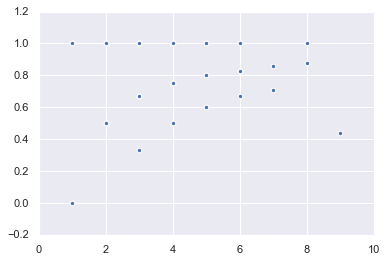

In [98]:
plt.scatter(results.fg_attemps, results.completion_percentage)
results.fg_attemps.size

In [43]:
fg

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
16,432,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,0,1,0.247892,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,2266,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-2.356327,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,3708,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,0,1,-3.785307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274,2099,2021_01_BAL_LV,2021091300,LV,BAL,REG,1,LV,home,BAL,...,0,1,0.183124,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295,2611,2021_01_BAL_LV,2021091300,LV,BAL,REG,1,BAL,away,LV,...,0,1,0.672860,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18801,3228,2021_07_PHI_LV,2021102407,LV,PHI,REG,7,LV,home,PHI,...,0,0,0.625605,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18876,936,2021_07_WAS_GB,2021102401,GB,WAS,REG,7,WAS,away,GB,...,0,1,-3.909343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18886,1173,2021_07_WAS_GB,2021102401,GB,WAS,REG,7,GB,home,WAS,...,0,1,-3.671321,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18953,3011,2021_07_WAS_GB,2021102401,GB,WAS,REG,7,GB,home,WAS,...,0,1,0.602523,NaN,NaN,NaN,NaN,NaN,NaN,NaN
